In [13]:
# !pip install gekko
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt
import math
import os


# Задача 1

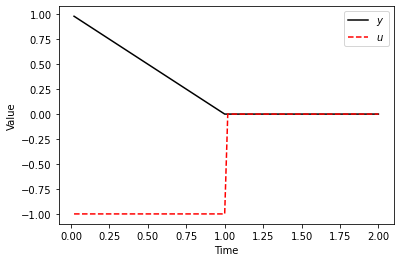

In [14]:
# Инициализируем модель
m = GEKKO(remote=False)
nt = 101
m.time = np.linspace(0,2,nt)

# Задаём переменные
y = m.Var(value=1)
z = m.Var(value=5)
u = m.Var(value=0,lb=-1,ub=1)
t = m.Var(value=0)
p = np.zeros(nt)    # Отмечаем последнюю точку
p[-1] = 1.0
final = m.Param(value=p)


# Задаём уравнения
m.Equation(y.dt() == u)
m.Equation(t.dt() == 1)
m.Equation(z.dt() == 0.5 * y ** 2 + y**2 * t**2)
m.Obj(z * final)    # Целевая функция
m.options.IMODE = 6 # 6 -- задача оптимального управления/динамического программирования
m.solve(disp=False)


# Рисуем получившееся решение
plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Задача 2

In [15]:
m = GEKKO(remote = False)
nt = 301
m.time = np.linspace(0,2,nt)

y = m.Var(value=2)
z = m.Var(value=0)
u = m.Var(value=0)
p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)


m.Equation(y.dt()==y + u)
m.Equation(z.dt()==-y + (u ** 2) * 0.5 + u)
m.Obj(z*final)
m.options.IMODE = 6
m.solve(disp=False)

def u_a(t):
    return [math.exp(-elem + 2) - 2 for elem in t]


def y_a(t):
    return [2 + 0.5 * math.exp(2) * (math.exp(elem) - math.exp(-elem)) for elem in t]


plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.plot(m.time,y.value,'k-',label=r'$y$')
plt.plot(m.time,y_a(m.time),'r--',label=r'$y^*$')
plt.legend(loc='best')
plt.ylabel('Value')
plt.subplot(2,1,2)
plt.plot(m.time,u.value,'k-',label=r'$u$')
plt.plot(m.time,u_a(m.time),'r--',label=r'$u^*$')
plt.legend(loc='best')
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()


# Задача 3

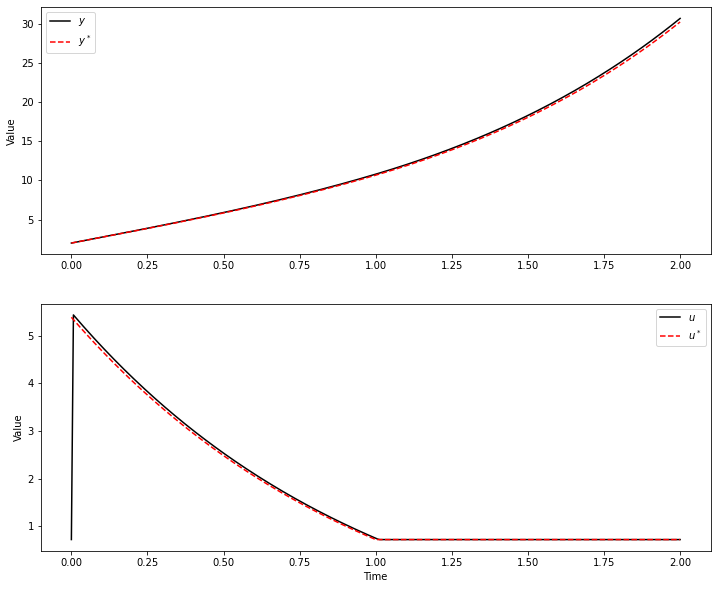

In [ ]:

m = GEKKO(remote = False)
nt = 301
m.time = np.linspace(0,2,nt)

y = m.Var(value=2)
z = m.Var(value=0)
t = m.Var(value = 0)
u = m.Var(value=np.e-2, lb=np.e-2)
p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

m.Equation(y.dt()==y + u)
m.Equation(t.dt() == 1)
m.Equation(z.dt()==-y + (u ** 2) * 0.5 + u)
m.Obj(z*final)
m.options.IMODE = 6
m.solve(disp=False)



def u_a(t):
    return [math.exp(-elem + 2) - 2 if elem <= 1
            else math.e - 2
            for elem in t]


def y_a(t):
    return [2 + 0.5 * math.exp(2) * (math.exp(elem) - math.exp(-elem)) if elem <= 1
            else (1 + 0.5 * (math.e ** 2 - 1)) * math.exp(elem) - math.e + 2
            for elem in t]


plt.figure(figsize=(12, 10))
plt.subplot(2,1,1)
plt.plot(m.time,y.value,'k-',label=r'$y$')
plt.plot(m.time,y_a(m.time),'r--',label=r'$y^*$')
plt.legend(loc='best')
plt.ylabel('Value')
plt.subplot(2,1,2)
plt.plot(m.time,u.value,'k-',label=r'$u$')
plt.plot(m.time,u_a(m.time),'r--',label=r'$u^*$')
plt.legend(loc='best')
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()

# Задача 4

Найденное T: 4.2969916743


/tmp/ipykernel_22410/4219615889.py:37: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(tm, y1.value, 'k-', LineWidth=2, label=r'$y_1$')
/tmp/ipykernel_22410/4219615889.py:38: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(tm, y2.value, 'b-', LineWidth=2, label=r'$y_2$')
/tmp/ipykernel_22410/4219615889.py:39: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(tm, y3.value, 'g--', LineWidth=2, label=r'$y_3$')
/tmp/ipykernel_22410/4219615889.py:40: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(tm, u.value, 'r--', LineWidth=2, label=r'$u$')


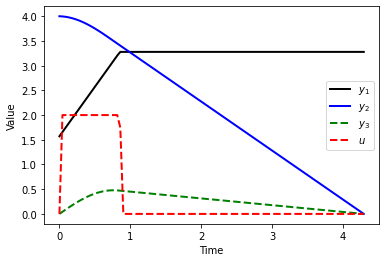

In [ ]:
# необходимый оптимизатор IPOPT доступен только в gekko под Winsows
# для Linux/Max необходима опция remote=True
isLinux = os.name == 'posix'

m = GEKKO(remote=isLinux)
nt = 101
tm = np.linspace(0, 1, nt)
m.time = tm

y1 = m.Var(value=np.pi / 2.0)
y2 = m.Var(value=4.0)
y3 = m.Var(value=0.0)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

T = m.FV(value=1.0, lb=0.1, ub=100.0)
T.STATUS = 1

u = m.MV(value=0, lb=-2, ub=2)
u.STATUS = 1

m.Equation(y1.dt() == u * T)
m.Equation(y2.dt() == m.cos(y1) * T)
m.Equation(y3.dt() == m.sin(y1) * T)

m.Equation(y2 * final <= 0)
m.Equation(y3 * final <= 0)

m.Obj(T)

m.options.IMODE = 6
m.solve(disp=False)

print('Найденное T: ' + str(T.value[0]))

tm = tm * T.value[0]

plt.figure(1)
plt.plot(tm, y1.value, 'k-', linewidth=2, label=r'$y_1$')
plt.plot(tm, y2.value, 'b-', linewidth=2, label=r'$y_2$')
plt.plot(tm, y3.value, 'g--', linewidth=2, label=r'$y_3$')
plt.plot(tm, u.value, 'r--', linewidth=2, label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()